# Using Python tools for a analysis of COVID-19 data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

### Obs.: Plotly doesn't open in Github. Please download notebook to use.

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
pd.options.display.float_format = '{:.4f}'.format

### <span style="color:red">Selecting Countries by the following conditions: 50k total cases and 35k deaths</span>

In [4]:
numberCases = 50000
numberDeaths = 35000

### <span style="color:red">Analysis of the last N days</span>

In [5]:
Ndays = '200days'

###  <span style="color:red">Day range for matplotlib</span>

In [6]:
Ninterval = 10

In [7]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [8]:
# filename = '/home/davi/Documents/Python/Covid-19-Data/owid-covid-data.csv'

In [9]:
# df = pd.read_csv(filename)
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.3370,1803.9870,nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300
1,AFG,Asia,Afghanistan,2020-01-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.3370,1803.9870,nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300
2,AFG,Asia,Afghanistan,2020-01-02,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.3370,1803.9870,nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300
3,AFG,Asia,Afghanistan,2020-01-03,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.3370,1803.9870,nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300
4,AFG,Asia,Afghanistan,2020-01-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.3370,1803.9870,nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36552,NaN,NaN,International,2020-02-28,705.0000,0.0000,4.0000,0.0000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
36553,NaN,NaN,International,2020-02-29,705.0000,0.0000,6.0000,2.0000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
36554,NaN,NaN,International,2020-03-01,705.0000,0.0000,6.0000,0.0000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
36555,NaN,NaN,International,2020-03-02,705.0000,0.0000,6.0000,0.0000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [10]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[df['date'] > pd.to_datetime("today") - pd.to_timedelta(Ndays)]
df = df.sort_values(by=['total_cases'], ascending=True)
df

,date,location,total_cases,total_deaths,new_cases,new_deaths
28,2020-01-28,Afghanistan,0.0000,0.0000,0.0000,0.0000
23916,2020-02-19,New Zealand,0.0000,0.0000,0.0000,0.0000
23915,2020-02-18,New Zealand,0.0000,0.0000,0.0000,0.0000
23914,2020-02-17,New Zealand,0.0000,0.0000,0.0000,0.0000
23913,2020-02-16,New Zealand,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...
34154,2020-03-14,United Arab Emirates,nan,nan,nan,nan
35572,2020-03-03,Vietnam,nan,nan,nan,nan
35573,2020-03-04,Vietnam,nan,nan,nan,nan
35574,2020-03-05,Vietnam,nan,nan,nan,nan


# Number of cases and deaths in World

In [11]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld = dfWorld.loc[:,['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dfWorld.reset_index(drop=True, inplace=True)
dfWorld

,date,total_cases,total_deaths,new_cases,new_deaths
0,2020-01-28,4587.0000,106.0000,1767.0000,25.0000
1,2020-01-29,6067.0000,132.0000,1480.0000,26.0000
2,2020-01-30,7823.0000,170.0000,1756.0000,38.0000
3,2020-01-31,9824.0000,213.0000,2001.0000,43.0000
4,2020-02-01,11946.0000,259.0000,2122.0000,46.0000
...,...,...,...,...,...
194,2020-08-09,19625886.0000,726846.0000,267084.0000,5673.0000
195,2020-08-10,19855145.0000,731334.0000,229259.0000,4488.0000
196,2020-08-11,20075163.0000,736317.0000,220018.0000,4983.0000
197,2020-08-12,20334160.0000,742426.0000,258997.0000,6109.0000


In [12]:
timestamps = sorted(set(dfWorld.loc[:, 'date'].values))

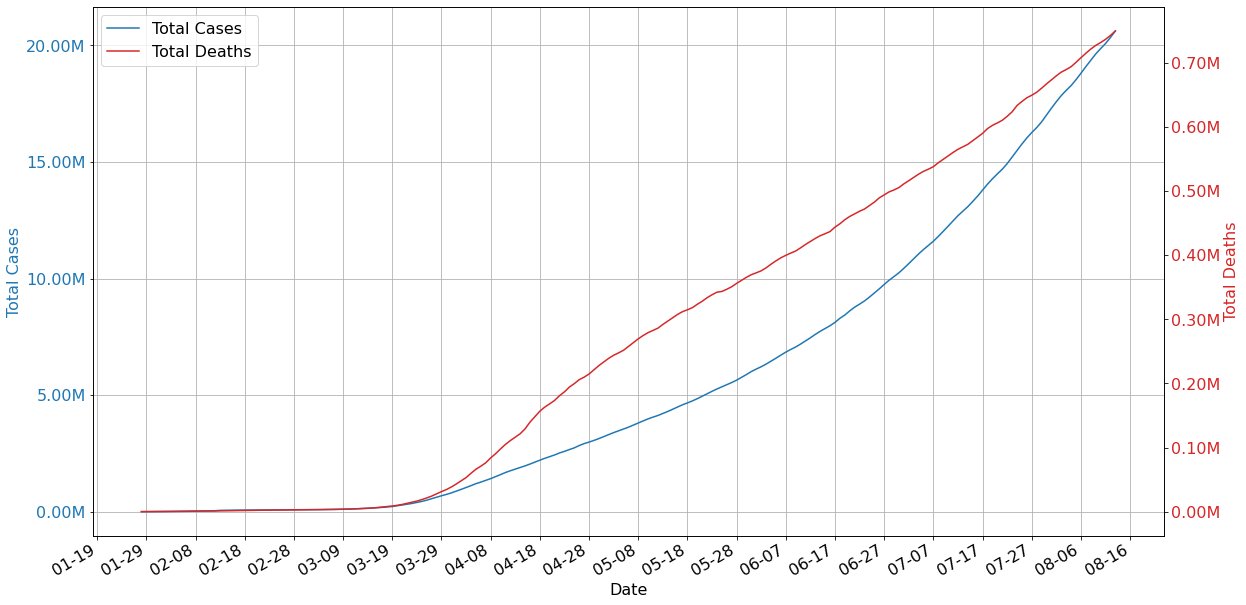

In [13]:
fig, ax1 = plt.subplots(figsize=(19.20,10.80))

color = 'tab:blue'
ax1.plot(dfWorld.date, dfWorld.total_cases, color=color, label='Total Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(dfWorld.date, dfWorld.total_deaths, color=color, label = 'Total Deaths')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
plt.gcf().autofmt_xdate()

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

plt.show()

### Daily deaths [WORLD]

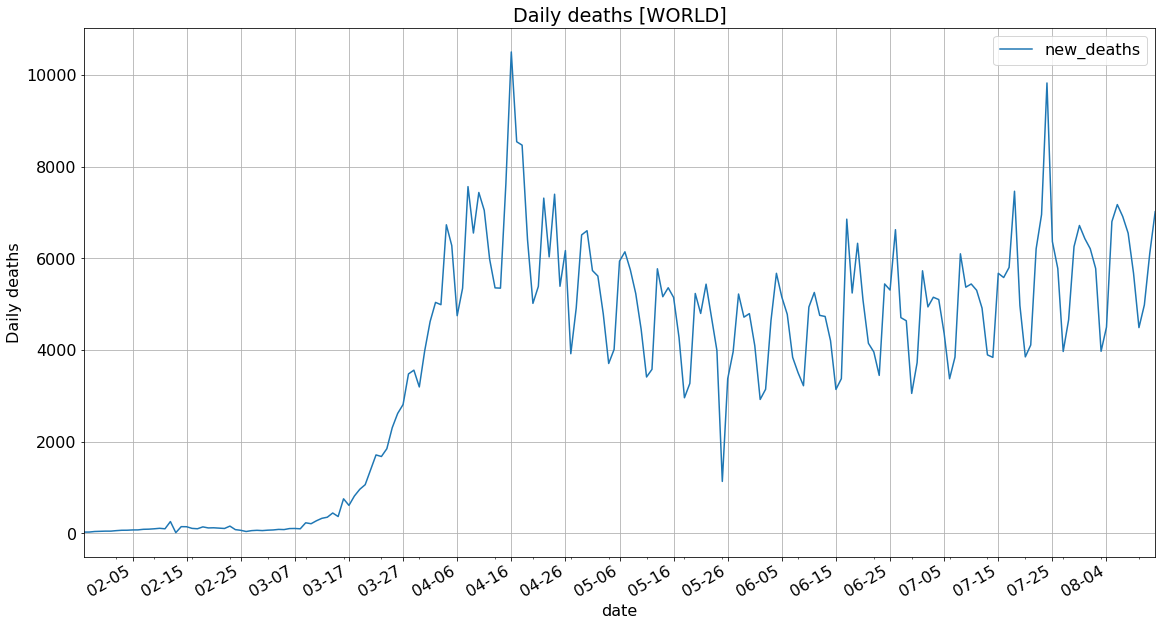

In [14]:
dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Daily deaths')
plt.title('Daily deaths [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

#### Plotly example

### Daily cases [WORLD]

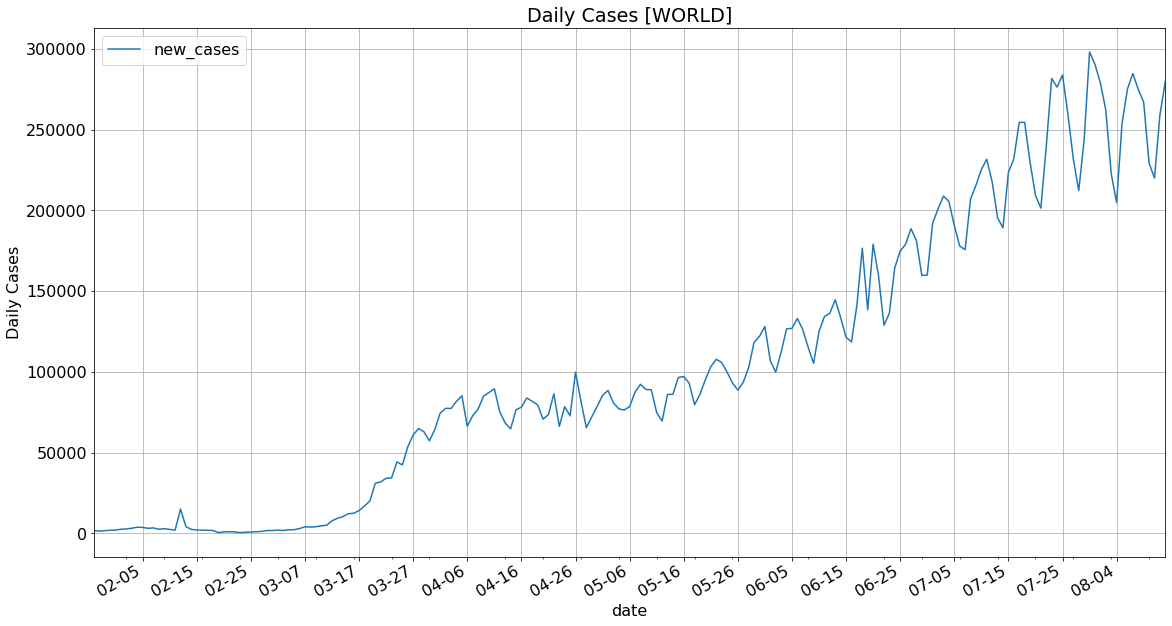

In [15]:
dfWorld.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Daily Cases')
plt.title('Daily Cases [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

## Forecast to daily deaths [WORLD]

#### LSTM Network for Regression

#### Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [16]:
dfPredict = dfWorld.loc[:,['date','total_cases']]
dfPredict = dfPredict[(dfWorld['new_deaths'] > 200)]
dfPredict = dfPredict.sort_values(by='date', ascending=True)
dfPredict['date'] = dfPredict['date'].dt.year.astype('str')+'-'+dfPredict['date'].dt.month.astype('str')+'-'+dfPredict['date'].dt.day.astype('str')
dfPredict.reset_index(drop=True, inplace=True)
dfPredict

,date,total_cases
0,2020-2-13,60329.0000
1,2020-3-9,110984.0000
2,2020-3-10,115746.0000
3,2020-3-11,120832.0000
4,2020-3-12,128670.0000
...,...,...
154,2020-8-9,19625886.0000
155,2020-8-10,19855145.0000
156,2020-8-11,20075163.0000
157,2020-8-12,20334160.0000


In [17]:
dfDeaths = dfPredict.drop(['date'],axis=1)

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dfDeaths)

In [19]:
train_size = int(len(dataset)*0.75)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train), len(test))

119 40


In [20]:
def create_dataset(dataset, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookBack-1):
        a = dataset[i:(i+lookBack),0]
        dataX.append(a)
        dataY.append(dataset[i+lookBack,0])
    return np.array(dataX), np.array(dataY)

In [21]:
lookBack = 1
trainX, trainY = create_dataset(train, lookBack)
testX, testY = create_dataset(test, lookBack)

In [22]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [23]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, return_sequences=True, input_shape=((1, lookBack))))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [24]:
history = model.fit(trainX, trainY, epochs=50, batch_size=10, validation_split=0.01, verbose=1, shuffle=False)

Epoch 1/50
12/12 [==============================] - 1s 107ms/step - loss: 0.0420 - mse: 0.0420 - val_loss: 0.1913 - val_mse: 0.1913
Epoch 2/50
12/12 [==============================] - 0s 12ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.1390 - val_mse: 0.1390
Epoch 3/50
12/12 [==============================] - 0s 16ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0997 - val_mse: 0.0997
Epoch 4/50
12/12 [==============================] - 0s 17ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0736 - val_mse: 0.0736
Epoch 5/50
12/12 [==============================] - 0s 17ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 6/50
12/12 [==============================] - 0s 17ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 7/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 8/50
12/12 [==============================] - 0s 12ms/step - loss: 0.0121 - 

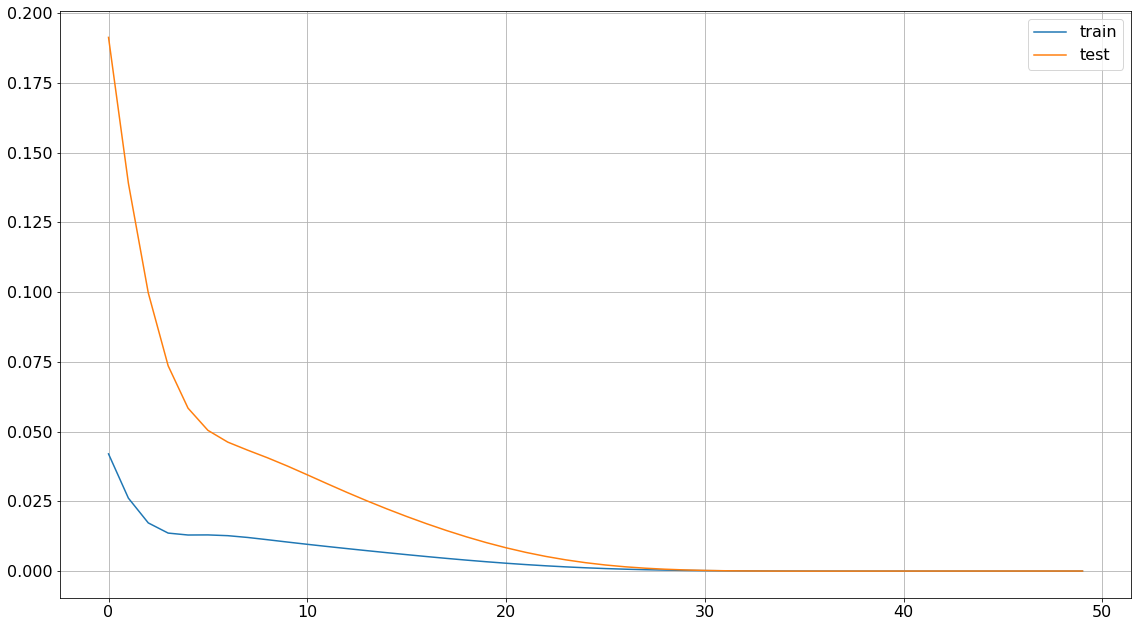

In [25]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend()

In [26]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [27]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookBack:len(trainPredict)+lookBack, :] = trainPredict

In [ ]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookBack*2)+1:len(dataset)-1, :] = testPredict

In [ ]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.ylabel('Number of Cases')
plt.title('Forecast to daily deaths [WORLD]')

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().legend(('New Deaths','Train','Test'))

plt.grid()
plt.show()